In [1]:
import sys
import os
from ase.build import bulk
from ase.visualize.plot import plot_atoms
from ase.build.surfaces_with_termination import surfaces_with_termination
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(25,10))
import numpy as np
from ase.build import sort
from ase.io.vasp import read_vasp
from ase.build import surface, make_supercell
from ase.build import sort
from ase.geometry import get_layers
import Tools as tl
from ase.visualize import view


# Parámetros 

In [2]:
surfacelocation = 'Surfaces'
if not os.path.exists(surfacelocation):
    os.makedirs(surfacelocation)
vacuum = 5

# Creo celda ZrO2 2x2 en el plano (0 0 1) y un sitio tipo 'top'

In [3]:
layers_zro2 = 4
Na_zro2=2
Nb_zro2=2

In [4]:
zro2 = read_vasp('Structure/POSCAR_ZrO2')

In [5]:
ZrO2001Oterm = surfaces_with_termination(zro2, [0,0,1],layers=layers_zro2, vacuum=vacuum, termination='O',verbose=True, symmetric=True)

([4], ['Zr']) ([20], ['O'])
([5], ['Zr']) ([21], ['O'])
([5], ['Zr']) ([21], ['O'])
([5], ['Zr']) ([21], ['O'])
([4], ['Zr']) ([20], ['O'])
([4], ['Zr']) ([20], ['O'])


## Seleccionar sitio de alta simetría para el apilamiento de ZrO2

### sitio debe ser igual a 'top','hollow1','hollow2','bridge'

In [6]:
ZrO2001Oterm_2x2_unsorted = [make_supercell(thisurface,[[Na_zro2,0,0],[0,Nb_zro2,0],[0,0,1]],tol=1e-10, wrap=True) for thisurface in ZrO2001Oterm]
ZrO2001Oterm_2x2 = sort(ZrO2001Oterm_2x2_unsorted[0])

In [7]:
zro2surfacefile = os.path.join(surfacelocation,f'zro2001_{Na_zro2:d}x{Nb_zro2:d}x{layers_zro2}.vasp')
ZrO2001Oterm_2x2.write(zro2surfacefile, format='vasp')

In [8]:
sitio = 'hollow2' # elegir uno de ['top', 'hollow1', 'hollow2', 'bridge']
              # hay que incluirlo en tools !

layer, height = get_layers(ZrO2001Oterm_2x2, (0,0,1), tolerance=0.7)
h_sitio = ZrO2001Oterm_2x2.positions.max(axis=0)[-1]

if sitio == 'top':
    tl.get_adsite(ZrO2001Oterm_2x2, site='top', face='top')
    ontop = tl.make_adstruc(ZrO2001Oterm_2x2, 'RotBotTop', theface='top', thesite='top')

elif sitio == 'hollow1':
    hollow1 = ZrO2001Oterm_2x2.positions[layer == 13].mean(axis=0)[:2]
    hollow1 = np.append(hollow1, h_sitio) #h_sitios)
    ZrO2001Oterm_2x2.info = {'adatom': {'top': {'hollow1': hollow1}}}
    onhollow1 = tl.make_adstruc(ZrO2001Oterm_2x2, 'hollow1', thesite='hollow1', theface='top',)
    tl.get_adsite(ZrO2001Oterm_2x2, 'hollow1', 'top')

elif sitio == 'hollow2':
    hollow2 = ZrO2001Oterm_2x2.positions[layer == 13][0][:2]
    hollow2 = np.append(hollow2, h_sitio) #h_sitios)
    ZrO2001Oterm_2x2.info = {'adatom': {'top': {'hollow2': hollow2}}}
    onhollow2 = tl.make_adstruc(ZrO2001Oterm_2x2, 'hollow2', thesite='hollow2', theface='top',)
    tl.get_adsite(ZrO2001Oterm_2x2, 'hollow2', 'top')

elif sitio == 'bridge':
    bridge = ZrO2001Oterm_2x2.positions[layer == 14].mean(axis=0)[:2]
    bridge = np.append(bridge, h_sitio) #h_sitios)
    ZrO2001Oterm_2x2.info = {'adatom': {'top': {'bridge': bridge}}}
    onbridge = tl.make_adstruc(ZrO2001Oterm_2x2, 'bridge', thesite='bridge', theface='top',)
    tl.get_adsite(ZrO2001Oterm_2x2, 'bridge', 'top')

# Creo celda Zr 1x1 con eje c paralelo a (1 0 -1 0), roto, hago simetria, agrego sitio tipo "top"

In [9]:
layers_zr = 4
Na_zr = 1
Nb_zr = 2

In [10]:
# co es solo para que tenga otro color, hay qye cambiarlo antes de calcular
zrortho = bulk('Co', crystalstructure='hcp', orthorhombic=True,a=3.2313,c=5.1479)


In [24]:
from ase.build import surface

In [25]:
test_surface = surface(zrortho, (0,1,0), 5, vacuum=5)

`surfaces_with_termination` usa `ase.build.surface` para crear las superficies. 
según el manual del ase, [`ase.build.surface`](https://wiki.fysik.dtu.dk/ase/ase/build/surface.html) hace una superficie con `vacuum` a cada lado del slab.
Luego `surfaces_with_termination` remueve átomos de la capa superior [](https://gitlab.com/ase/ase/-/blob/master/ase/build/surfaces_with_termination.py#L42) hasta que la composición de la misma es la que se pide en el parametro `termination`. 

Por lo tanto, no es de extrañar que el `vacuum` final sea distinto al que se pide en el argumento de la función

In [ ]:
Zr10m10 = surfaces_with_termination(zrortho, (0, 1, 0), layers_zr, vacuum=vacuum, termination='Co')[0]
zrsymmetric = tl.make_symmetric(Zr10m10,natoms=3)
Zr10m10_2x2_unsorted = make_supercell(zrsymmetric,[[Na_zr,0,0],[0,Nb_zr,0],[0,0,1]],tol=1e-10, wrap=True)
Zr10m10_2x2 = sort(Zr10m10_2x2_unsorted)

In [11]:
zrsurfacefile = os.path.join(surfacelocation,f'zr10m10_{Na_zr:d}x{Nb_zr:d}x{layers_zr}.vasp')
Zr10m10_2x2.write(zrsurfacefile, format='vasp')

El loop que había en las ramas anteriores estaba bien, pero había que cambiar el orden de las cosas y aprovecho para ordenar todo un poco

Los angulos a considerar para las rotaciones son:

In [12]:
angs = np.linspace(0,45,4)

In [13]:
notyetrotated = [Zr10m10_2x2.copy() for ang in angs]

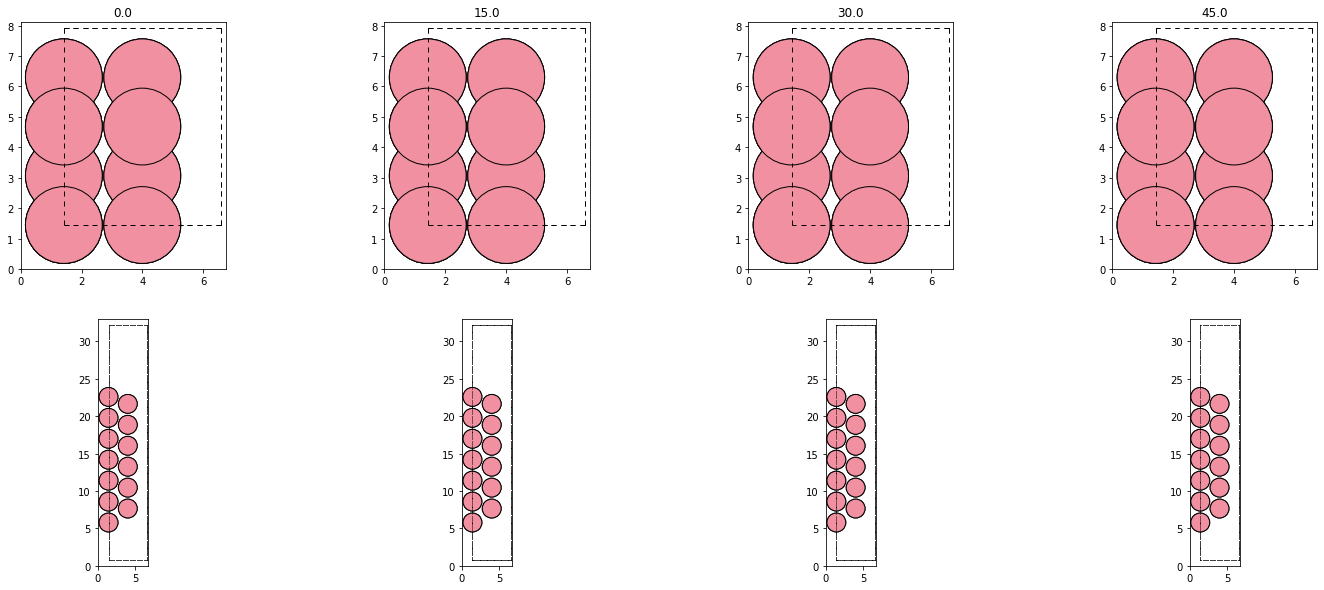

In [14]:
tl.plotcases(notyetrotated, angs)

First, only scale the Zr slabs: 

In [15]:
scaled_rotated = [tl.scalecell(thisatoms, ZrO2001Oterm_2x2.cell.copy()) for thisatoms in notyetrotated]

And finally do the rotations:

In [16]:
dotherotations =  [thiscaled.rotate(ang,'z') for thiscaled, ang in zip(scaled_rotated, angs)]

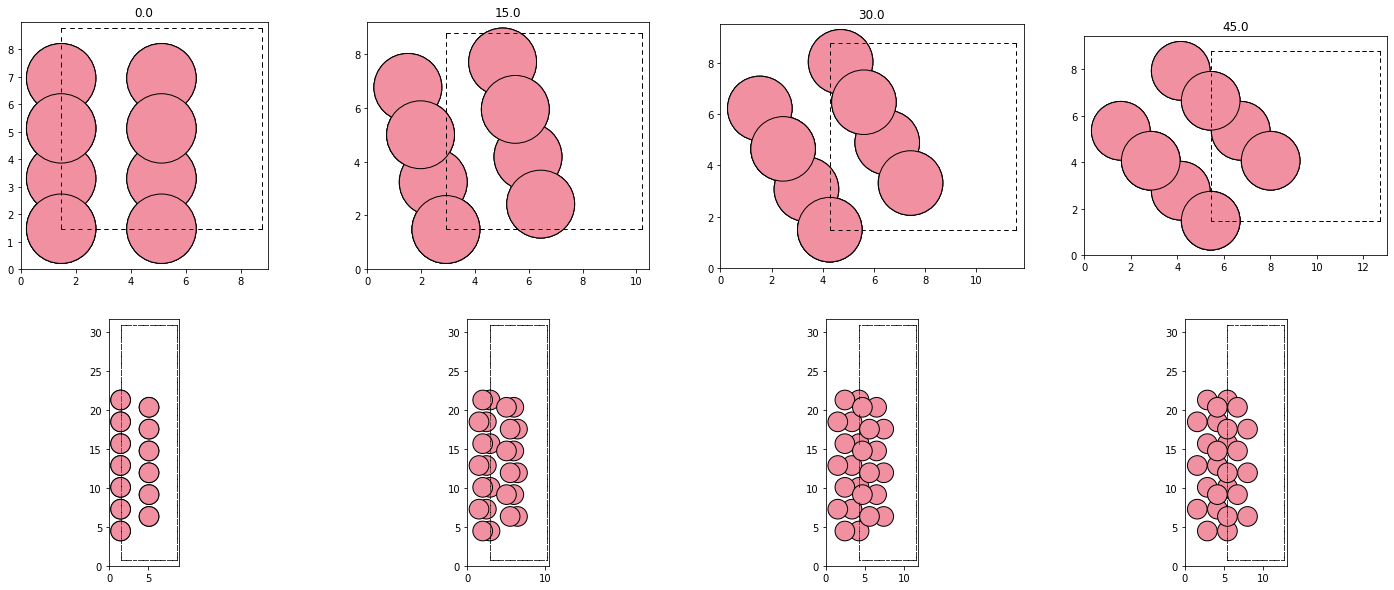

In [17]:
tl.plotcases(scaled_rotated,angs)

# Make the sites on Zr surface 

In [18]:
getsites = [tl.get_adsite(this,face='bottom', site='top') for this in scaled_rotated]

# Make the Stacks

interfacial distance:

In [19]:
d = 2.5 

# stacks: 

In [20]:
allthestacks = [tl.stack(ZrO2001Oterm_2x2, thescalrot, sitio, 'top', 2.5) for thescalrot in scaled_rotated]
wraptem = [thestack.wrap(pretty_translation = True) for thestack in allthestacks]

write the stacks

In [21]:
parentlocation = 'Interfaces_20220508'
if not os.path.exists(parentlocation):
    os.makedirs(parentlocation)
for stack, ang in zip(allthestacks, angs):
    name = os.path.join(parentlocation, f'zro2_001_{sitio}_zr_10m10_{Na_zr}x{Nb_zr}_top_d_{d:.3f}_{ang:.3f}_rotated.vasp')
    stack.write(name, direct=True, sort=True)
    stack.write(name.replace('vasp','xyz'),format='xyz')

# Algunas Visualizaciones 

(<Axes:>, <Axes:>, <Axes:>)

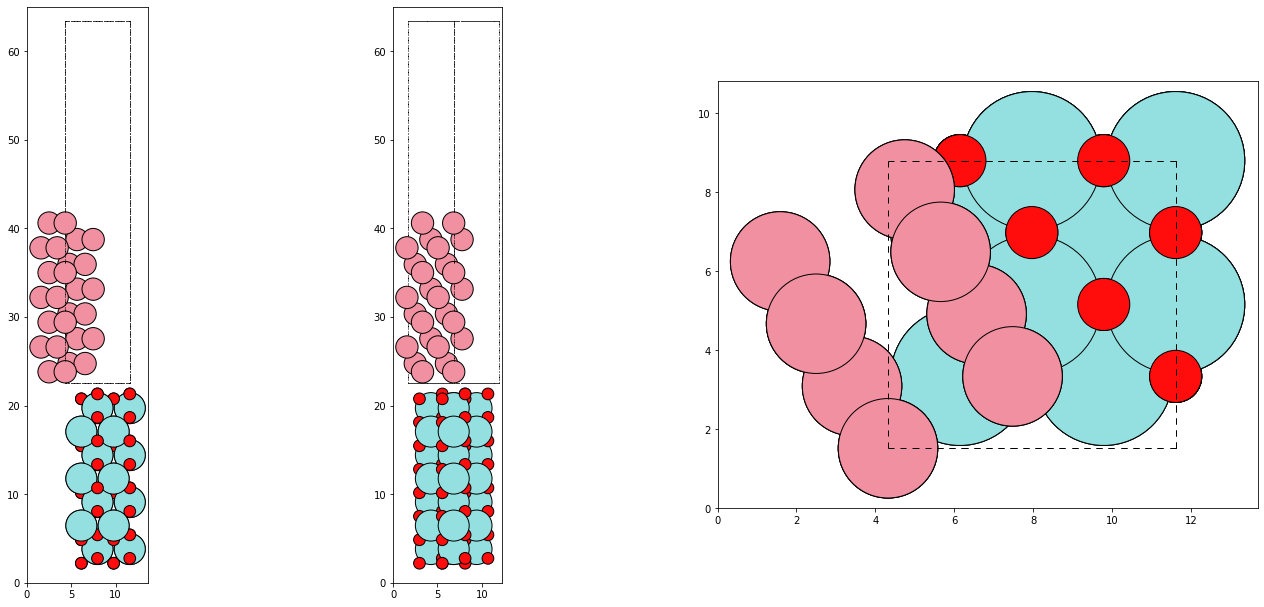

In [22]:
tl.plotviews(allthestacks[2])